## Bayesian Statistics Made Simple

Code and exercises from my workshop on Bayesian statistics in Python.

Copyright 2019 Allen Downey

MIT License: https://opensource.org/licenses/MIT

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd

import seaborn as sns
sns.set_style('white')
sns.set_context('talk')

import matplotlib.pyplot as plt

from distribution import Pmf

Suppose you have two urns full of marbles:

* Urn 1 has 20 blue and 10 red marbles

* Urn 2 has 10 blue and 20 red marbles.

You choose an urn at random and draw two marbles.  They are both blue.  What is the probability that you chose Urn 1?

In [2]:
pmf = Pmf.from_seq(['Urn 1', 'Urn 2'])
pmf['Urn 1'] *= (2/3)**2
pmf['Urn 2'] *= (1/3)**2
pmf.normalize()
pmf

,probs
Urn 1,0.8
Urn 2,0.2


In [3]:
pmf = Pmf.from_seq(['Urn 1', 'Urn 2'])
pmf['Urn 1'] *= 20/30 * 19/29
pmf['Urn 2'] *= 10/30 * 9/29
pmf.normalize()
pmf

,probs
Urn 1,0.808511
Urn 2,0.191489


Suppose I have a box of dice with one each of 4-sided, 6-sided, 8-sided, 10-sided, 12-sided, and 20-sided dice.

I choose a die at random, roll it, and get a 9.  What is the probability that I chose the 12-sided die?

In [4]:
dice = Pmf.from_seq([10,12,20])
dice[10] /= 10
dice[12] /= 12
dice[20] /= 20
dice.normalize()
dice

,probs
10,0.428571
12,0.357143
20,0.214286


Write a few lines of code that use the Pmf class to compute the answer to the following question.

Suppose I roll two six-sided dice and tell you (honestly) that the sum is not 7.

What is the probability that the sum is 2 or 12?

In [5]:
d6 = Pmf.from_seq([1,2,3,4,5,6])
twice = d6 + d6
twice[7] = 0
twice.normalize()
twice

,probs
2,0.033333
3,0.066667
4,0.100000
5,0.133333
6,0.166667
7,0.000000
8,0.166667
9,0.133333
10,0.100000
11,0.066667


In [6]:
twice[2] + twice[12]

0.06666666666666667

Suppose I flip the same coin twice and tell you only whether the outcomes are the same or different.

Write a likelihood function that takes data and hypo and returns the probability of the data under the hypothesis, where:

1. data is a string, either 'S' for the same outcome or 'D' for different, and

2. hypo is the hypothetical probability of heads, from 0-1

In [7]:
def likelihood_flip(data, hypo):
    """ Likelihood function for the Euro problem.
    
    data: string, either 'S' or 'D'
    hypo: prob of heads (0-1)
    
    returns: float probability
    """
    x = hypo
    if data == 'S':
        return x*x + (1-x)*(1-x)
    else:
        return 2 * x * (1-x)

In [8]:
def decorate_flip(title):
    """Labels the axes.
    
    title: string
    """
    plt.xlabel('Probability of heads')
    plt.ylabel('PMF')
    plt.title(title)

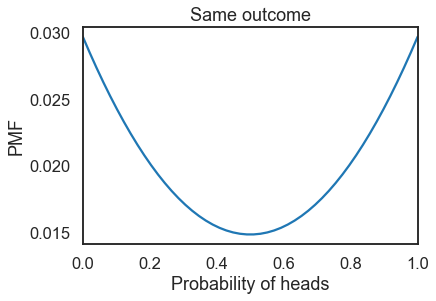

In [9]:
same = Pmf.from_seq(np.linspace(0, 1))
same.update(likelihood_flip, 'S')
same.plot()
decorate_flip('Same outcome')

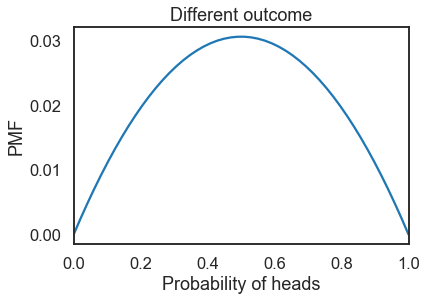

In [10]:
diff = Pmf.from_seq(np.linspace(0, 1))
diff.update(likelihood_flip, 'D')
diff.plot()
decorate_flip('Different outcome')

Suppose you have a fixed but unknown probability, `p`, of answering a question on this quiz correctly.

Out of six questions, the number you get correct, `k`, is well modeled by the binomial distribution with parameters `n` and `p`, where `n` is the number of questions.

Write a likelihood function that takes `data` and `hypo` and returns the probability of the data under the hypothesis, where:

1. `data` is a list of two values, `k` and `n`

2. `hypo` is your probability of getting a question right, `p`, from 0-1

In [11]:
from scipy.stats import binom

def likelihood_quiz(data, hypo):
    """ Likelihood function for the Euro problem.
    
    data: k, n
    hypo: p
    
    returns: float probability
    """
    k, n = data
    p = hypo
    
    return binom.pmf(k, n, p)

In [12]:
def decorate_quiz(title):
    """Labels the axes.
    
    title: string
    """
    plt.xlabel('Probability of correct')
    plt.ylabel('PMF')
    plt.title(title)

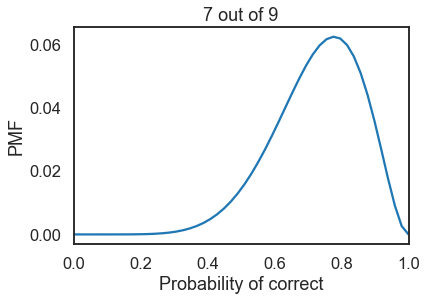

In [13]:
quiz = Pmf.from_seq(np.linspace(0, 1))
quiz.update(likelihood_quiz, (7, 9))
quiz.plot()
decorate_quiz('7 out of 9')